# Model Evaluation

The goal of the evaluation part is to determine which methods to use on a particular problem. Error on the training data is not a good indicator of the performance on future data. 
Ideally, we would like to have: 
* a large amount of data for training the model in order to have a more accurate model
* a large amount of data for testing the model in order to have a more reliable evaluation and a more accurate estimation of the error.

We need some techniques to training and evaluate the models properly. 
In this notebook we will explore the most important techniques used to create properly a training and test set and how to conduct a fair evaluation of the model performance.

In this notebook we will first create an artificial dataset to show how the different techniques split the dataset. Then we will use the Iris dataset and the KNearestNeighborsClassifier to show how to proper evaluate the model.


In [1]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from utilities.ml_plot_utilities import  plot_bar_compare_stratification, plot_repeated_holdout_train_test_score
import numpy as np

In [2]:
# Load the dataset and retrieve features and target
iris = load_iris()
X, y = iris.data, iris.target
knn = KNeighborsClassifier(n_neighbors=3)

## **Evaluation procedure #1: Resubstitution error** 
Train and test on the entire dataset. The error is called *resubstitution error*. It is the error rate obtained by resubstituiting the training instances into a classifier constructed with the very same dataset. 

1. Train the model on the **entire dataset**.
2. Test the model on the **same dataset**, and evaluate how well we did by comparing the **predicted** response values with the **true** response values.

**In general, is hopelessly optimistic!**

In [3]:
# fit the model with data
knn.fit(X, y)

# predict the response values for the observations in X
y_pred=knn.predict(X)

# evaluate the model on the same dataset
print(f'Accuracy score: {accuracy_score(y, y_pred)}')
print(f'Resubstitution error rate: {round(1-accuracy_score(y, y_pred),2)}')

Accuracy score: 0.96
Resubstitution error rate: 0.04


## **Evaluation procedure #2: holdout method** 
The holdout method reserves a certain amount for testing and uses the rest for training.

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X.shape, y.shape

((150, 4), (150,))

### Standard holdout method
We can now quickly sample a training set while holding out 30% of the data for testing (evaluating) our classifier.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

In [7]:
# fit the model with the training data
knn.fit(X_train, y_train)

# predict the response values for training and test data
y_train_pred=knn.predict(X_train)
y_test_pred=knn.predict(X_test)

print(f'Accuracy score on training data: {accuracy_score(y_train, y_train_pred)}')
print(f'Error rate on training data: {1-accuracy_score(y_train, y_train_pred)}')
print("===================================================")
print(f'Accuracy score on test data: {accuracy_score(y_test, y_test_pred)}')
print(f'Error rate on test data: {1-accuracy_score(y_test, y_test_pred)}')

Accuracy score on training data: 0.9619047619047619
Error rate on training data: 0.03809523809523807
Accuracy score on test data: 0.9777777777777777
Error rate on test data: 0.022222222222222254


### Stratified holdout method
The main issue in holdout estimation is that the classes in the training and test dataset could not be represented in equal proportions. We can use stratification to ensure that each class is represented in equal proportions in both subsets. 

To stratify, we need to pass the `stratify=y`, where `y` is the vector of the target values. 

In [8]:
_, _, y_train_non_stratified, _ = train_test_split(X, y, test_size=0.3, shuffle=True, stratify=None)
_, _, y_train_stratified, _ = train_test_split(X, y, test_size=0.3, shuffle=True, stratify=y)

Label           Split   0   1   2
0      Non-Stratified  36  35  34
1          Stratified  35  35  35


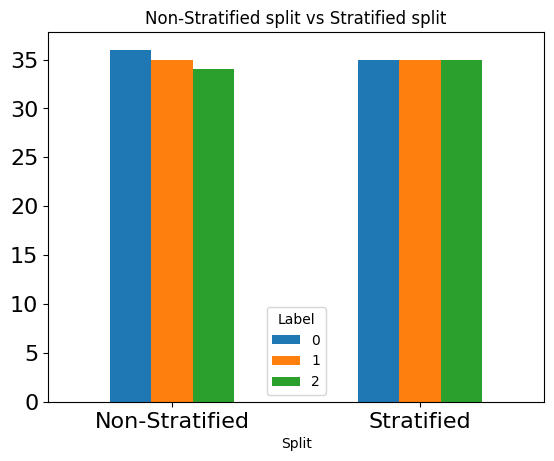

In [9]:
plot_bar_compare_stratification(y_train_non_stratified, y_train_stratified, return_plot=True, plot_summary_table=True)

### Repeated holdout method (stratified)
Holdout estimation can be made more reliable by repeating the process with different subsamples (usually 5 or 10 repetitions). In each iteration, a certain proportion is randomly selected for training (possibly with stratification). The error rates on the different iterations are averaged to yield an overall error rate. 

The issue of this approach is that different test sets may overlap!!

Mean Training Score: 0.9571
Standard Deviation Training Score: 0.0136
Mean Test Score: 0.9733
Standard Deviation Test Score: 0.0239


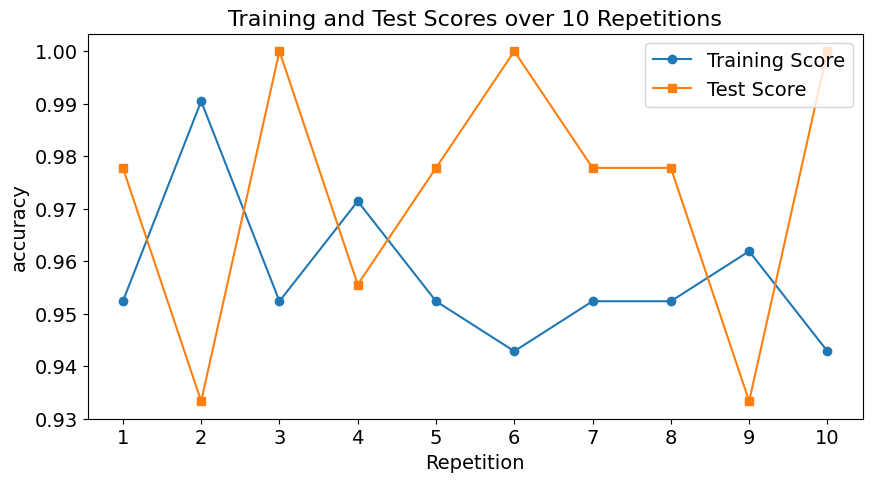

In [10]:
n_iter = 10
test_accuracy = np.zeros(n_iter)
train_accuracy = np.zeros(n_iter)

for i in range(n_iter):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, stratify=y)
    knn.fit(X_train, y_train)
    
    # .score() computed the accuracy score by calling
    # .predict() and then accuracy_score()
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)   

print(f"Mean Training Score: {train_accuracy.mean():.4f}")
print(f"Standard Deviation Training Score: {train_accuracy.std():.4f}")
print(f"Mean Test Score: {test_accuracy.mean():.4f}")
print(f"Standard Deviation Test Score: {test_accuracy.std():.4f}")

plot_repeated_holdout_train_test_score(train_accuracy, test_accuracy, n_iter, 'accuracy')